# Week 06: Business Statistics & Analytics - E-commerce Analysis

## Learning Objectives
By the end of this exercise, you will be able to:
- Calculate key business metrics using pandas
- Create meaningful visualizations for business insights
- Apply statistical concepts to real business scenarios
- Make data-driven recommendations

---

## Business Context

You're working as a Data Analyst for **TechMart**, an e-commerce company. Your manager needs insights from last quarter's sales data to inform strategic decisions for the upcoming quarter.

Your analysis will help answer critical questions about customer behavior, regional performance, and product trends that directly impact business growth.

## Dataset Setup

First, let's generate the synthetic dataset you'll be analyzing:

In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set random seed for reproducible results
np.random.seed(42)

# Generate 500 orders from 2023
n_orders = 500

# Create order IDs and customer data
order_id = np.arange(1, n_orders + 1)
customer_id = np.random.randint(1, 101, size=n_orders)
customer_segment = np.random.choice(["Student", "Professional", "Senior"], size=n_orders, p=[0.4, 0.4, 0.2])
region = np.random.choice(["North", "South", "East", "West"], size=n_orders)
order_date = pd.date_range(start="2023-01-01", periods=n_orders, freq="D")
product_category = np.random.choice(["Electronics", "Clothing", "Books", "Home", "Sports"], size=n_orders)
quantity = np.random.randint(1, 5, size=n_orders)
unit_price = np.round(np.random.uniform(10, 200, size=n_orders), 2)
revenue = quantity * unit_price
discount_applied = np.random.choice([0, 5, 10, 15, 20, 25, 30], size=n_orders, p=[0.5,0.1,0.1,0.1,0.05,0.05,0.1])
payment_method = np.random.choice(["Credit Card", "PayPal", "Gift Card", "Debit Card"], size=n_orders)

# Build dataframe
df = pd.DataFrame({
    "order_id": order_id,
    "customer_id": customer_id,
    "customer_segment": customer_segment,
    "region": region,
    "order_date": order_date,
    "product_category": product_category,
    "quantity": quantity,
    "unit_price": unit_price,
    "revenue": revenue,
    "discount_applied": discount_applied,
    "payment_method": payment_method
})

# Save dataset for reference
df.to_csv("ecommerce_data.csv", index=False)
print("✅ Dataset created successfully!")

# Display first few rows
df.head()

✅ Dataset created successfully!


,order_id,customer_id,customer_segment,region,order_date,product_category,quantity,unit_price,revenue,discount_applied,payment_method
0,1,52,Student,North,2023-01-01,Clothing,1,42.43,42.43,0,Debit Card
1,2,93,Student,West,2023-01-02,Sports,1,24.18,24.18,0,Gift Card
2,3,15,Professional,East,2023-01-03,Sports,3,158.71,476.13,0,Debit Card
3,4,72,Student,East,2023-01-04,Sports,1,60.42,60.42,0,Credit Card
4,5,61,Student,West,2023-01-05,Books,3,43.78,131.34,0,Gift Card


## Data Exploration

Let's start by understanding our dataset:

In [2]:
# Load the data
data = pd.read_csv("ecommerce_data.csv")

# Basic information about the dataset
print("Dataset Info:")
print(data.info())
print("\nDataset Shape:", data.shape)
print("\nFirst few rows:")
data.head()

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   order_id          500 non-null    int64  
 1   customer_id       500 non-null    int64  
 2   customer_segment  500 non-null    object 
 3   region            500 non-null    object 
 4   order_date        500 non-null    object 
 5   product_category  500 non-null    object 
 6   quantity          500 non-null    int64  
 7   unit_price        500 non-null    float64
 8   revenue           500 non-null    float64
 9   discount_applied  500 non-null    int64  
 10  payment_method    500 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 43.1+ KB
None

Dataset Shape: (500, 11)

First few rows:


,order_id,customer_id,customer_segment,region,order_date,product_category,quantity,unit_price,revenue,discount_applied,payment_method
0,1,52,Student,North,2023-01-01,Clothing,1,42.43,42.43,0,Debit Card
1,2,93,Student,West,2023-01-02,Sports,1,24.18,24.18,0,Gift Card
2,3,15,Professional,East,2023-01-03,Sports,3,158.71,476.13,0,Debit Card
3,4,72,Student,East,2023-01-04,Sports,1,60.42,60.42,0,Credit Card
4,5,61,Student,West,2023-01-05,Books,3,43.78,131.34,0,Gift Card


Monthly Revenue:
month
2023-01    6626.66
2023-02    6796.03
2023-03    8960.10
2023-04    7713.47
2023-05    7266.80
2023-06    7982.47
2023-07    7981.65
2023-08    6664.64
2023-09    9708.06
2023-10    7287.27
2023-11    8795.85
2023-12    8119.44
2024-01    7268.59
2024-02    8388.91
2024-03    6835.73
2024-04    7430.29
2024-05    4314.71
Freq: M, Name: revenue, dtype: float64


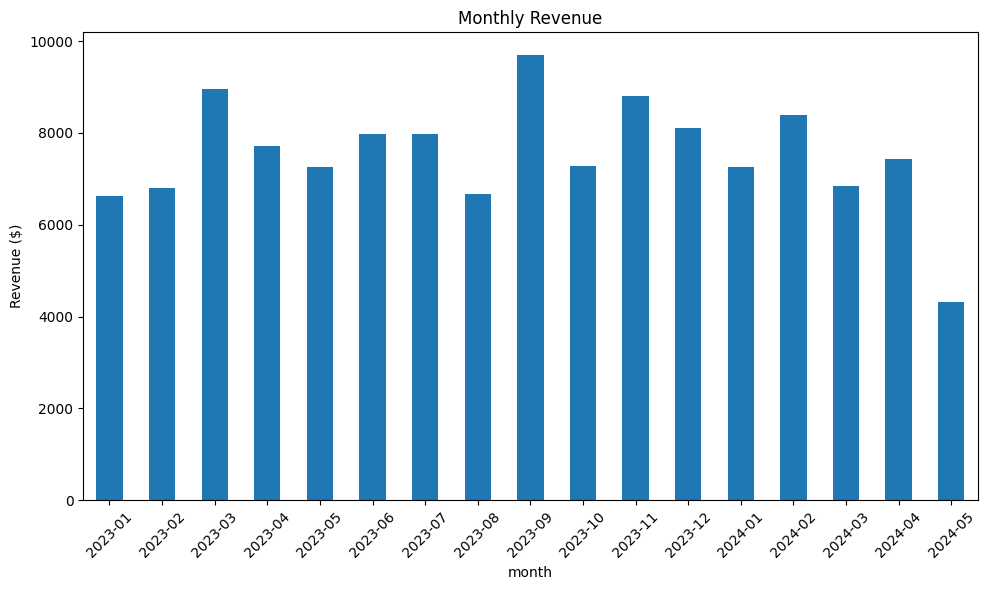

In [3]:
# Convert order_date to datetime and add helpful columns
data["order_date"] = pd.to_datetime(data["order_date"])
data["month"] = data["order_date"].dt.to_period("M")
data["day_of_week"] = data["order_date"].dt.day_name()

# Example: Revenue by month
monthly_revenue = data.groupby("month")["revenue"].sum()
print("Monthly Revenue:")
print(monthly_revenue)

# Plot monthly revenue
monthly_revenue.plot(kind="bar", figsize=(10,6), title="Monthly Revenue")
plt.ylabel("Revenue ($)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

---

## Business Questions

Now answer each of the following business questions. Use the starter code above as a reference, and expand your analysis to solve all questions.

### 1. Revenue Overview
What was the company's total revenue last quarter? Break it down by month.

Quarter Revenue:
month
2024-03    6835.73
2024-04    7430.29
2024-05    4314.71
Freq: M, Name: revenue, dtype: float64


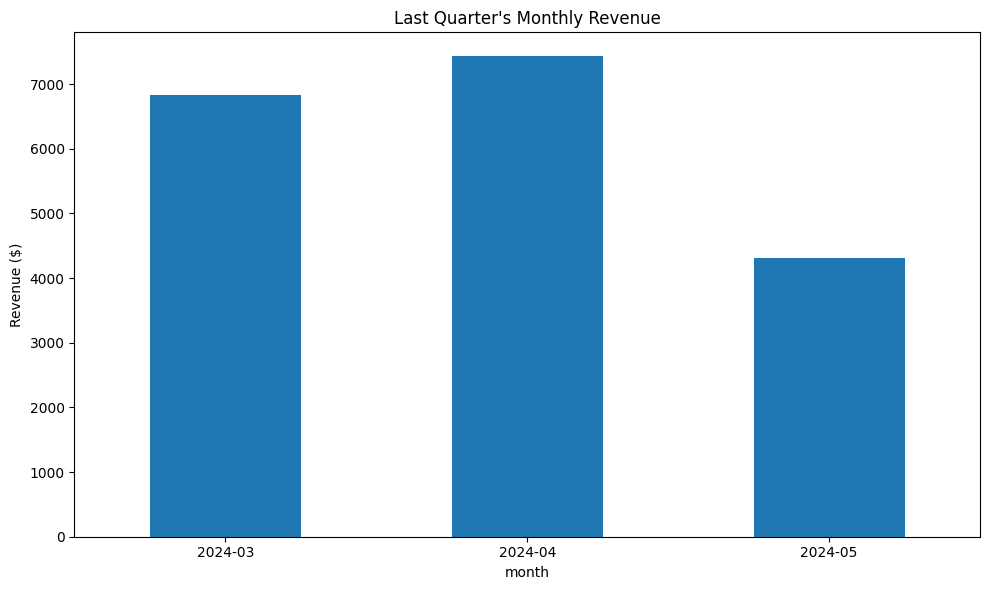

In [ ]:
# Revenue by month of the last quarter
quarter_revenue = data.groupby("month")["revenue"].sum().tail(3)
print("Quarter Revenue:")
print(quarter_revenue)

# Plot monthly revenue
quarter_revenue.plot(kind="bar", figsize=(10,6), title="Last Quarter's Monthly Revenue")
plt.ylabel("Revenue ($)")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

# Middle month of the last quarter had most revenue and the following month had the lowest.

### 2. Top Customers
Who are the top 5 customers by total revenue contribution?

Top 5 Customers by Total Revenue Contribution:
customer_id
62    4448.39
24    3369.44
90    2976.78
92    2838.74
97    2835.62
Name: revenue, dtype: float64


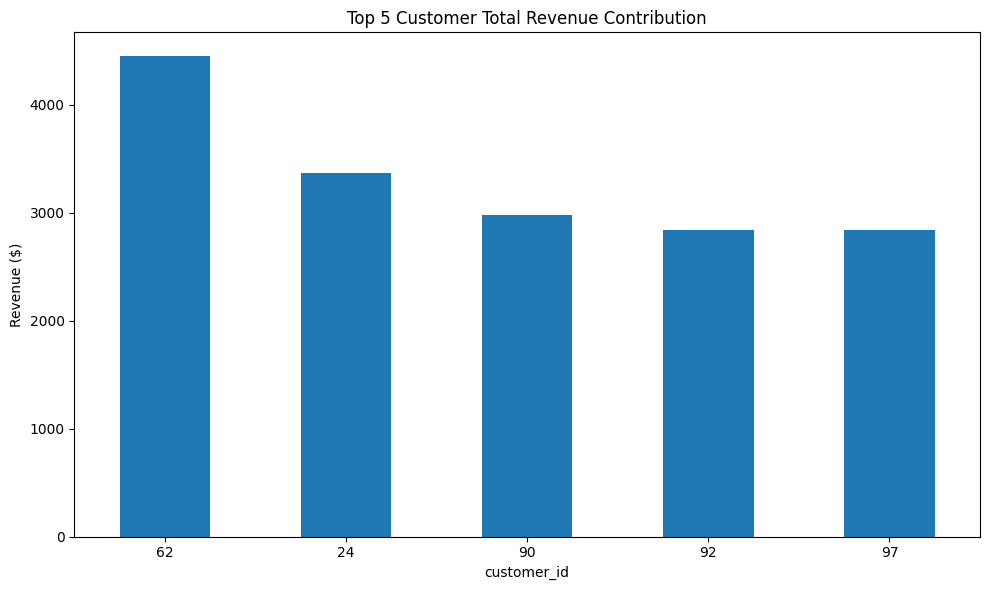

In [ ]:
# data['customer_id'].value_counts()
customer_revenue_sorted = data.groupby('customer_id')['revenue'].sum().sort_values(ascending=False)
print("Top 5 Customers by Total Revenue Contribution:")
print(customer_revenue_sorted.head(5))

customer_revenue_sorted.head(5).plot(kind="bar", figsize=(10,6), title="Top 5 Customer Total Revenue Contribution")
plt.ylabel("Revenue ($)")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

# I noticed id 62 had the most number of orders so I expect them to be one of the highest
# spending as well. The difference between them to the 2nd most, and the other places to their following place,
# is a lot larger ($1000+).

### 3. Segment Analysis
Which customer segment (Student, Professional, Senior) spends the most on average per order?

Customer Segment Spending per Order:
customer_segment
Professional    205.080
Student         196.325
Senior          180.780
Name: revenue, dtype: float64

Customer Segment with the Highest Spending per Order:
Professional    205.08


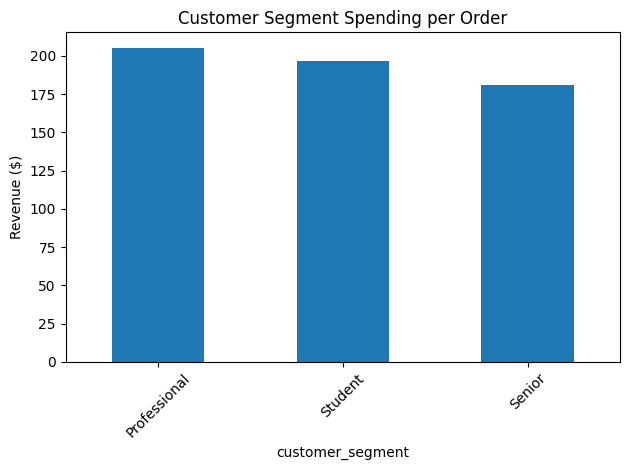

In [ ]:
# data.revenue.hist(bins=20) right skewed; I will use median instead of mean
# plt.show()
customer_segment_average_revenue = data.groupby("customer_segment")["revenue"].median().sort_values(ascending=False)
print("Customer Segment Spending per Order:")
print(customer_segment_average_revenue)

print("\nCustomer Segment with the Highest Spending per Order:")
print(customer_segment_average_revenue.head(1).to_string(header=False))

customer_segment_average_revenue.plot(kind="bar", title="Customer Segment Spending per Order")
plt.ylabel("Revenue ($)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# I had mean instead of median at first and it made them look more similar in spending,
# but using median made a clearer difference, showing Professionals spending the most.

### 4. Regional Trends
Which region generated the highest revenue? Which region had the highest average order size?

Revenue by Region:
region
East     31221.80
North    34351.69
South    34839.45
West     27727.73
Name: revenue, dtype: float64

Average Order Size by Region:
region
East     2.469231
North    2.360902
South    2.440945
West     2.627273
Name: quantity, dtype: float64

Region with Highest Revenue Generated:
South    34839.45

Region with Highest Average Order Size:
West    2.627273


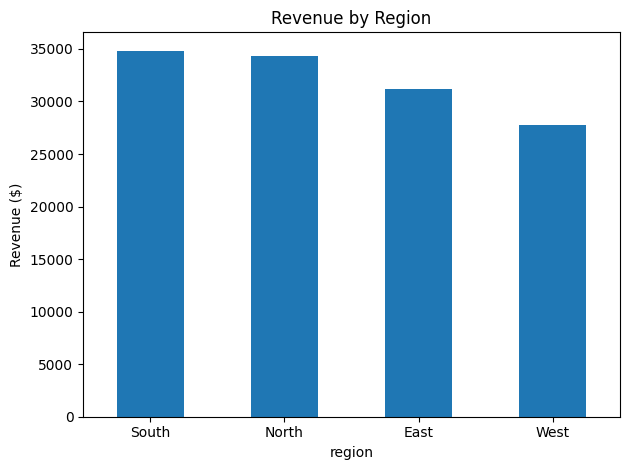

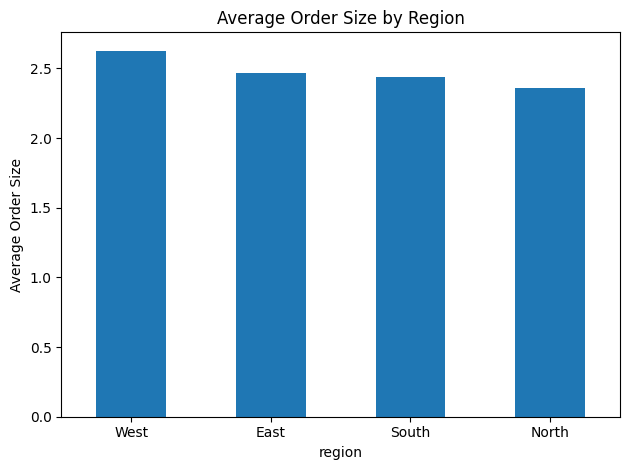

In [ ]:
# data.quantity.hist(bins=20) pretty balanced
# plt.show()

region_revenue = data.groupby("region")["revenue"].sum()
region_average_order_size = data.groupby("region")["quantity"].mean() # order size like total price or quantity?

print("Revenue by Region:")
print(region_revenue)
print("\nAverage Order Size by Region:")
print(region_average_order_size)

print("\nRegion with Highest Revenue Generated:")
print(region_revenue.nlargest(1).to_string(header=False))
print("\nRegion with Highest Average Order Size:")
print(region_average_order_size.nlargest(1).to_string(header=False))

region_revenue.sort_values(ascending=False).plot(kind="bar", title="Revenue by Region")
plt.ylabel("Revenue ($)")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

region_average_order_size.sort_values(ascending=False).plot(kind="bar", title="Average Order Size by Region")
plt.ylabel("Average Order Size")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

# I wasn't sure if order size was quantity or total price but I went with quantity, which 
# was similar throughout the regions. North and South regions had similar and higher revenue 
# with West being further from the rest.

### 5. Product Category Performance
Which product category is most popular by quantity vs. by revenue?

Product Category Popularity by Quantity:
product_category
Home           269
Clothing       253
Sports         246
Electronics    239
Books          227
Name: quantity, dtype: int64

Product Category Popularity by Revenue:
product_category
Home           29871.47
Electronics    25498.31
Clothing       24804.57
Books          24046.06
Sports         23920.26
Name: revenue, dtype: float64

Product Category Most Popular by Quantity:
Home    269

Product Category Most Popular by Revenue:
Home    29871.47


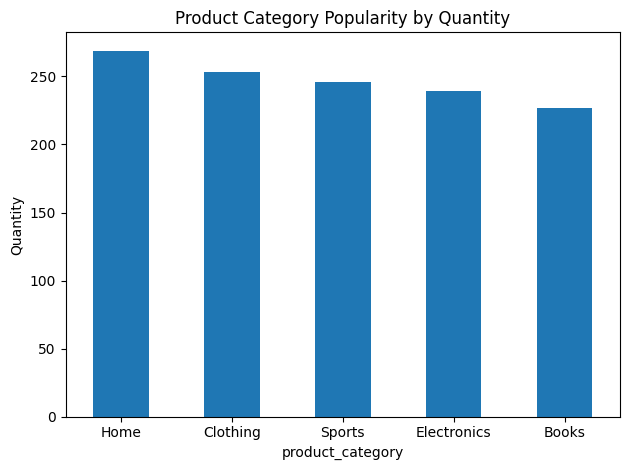

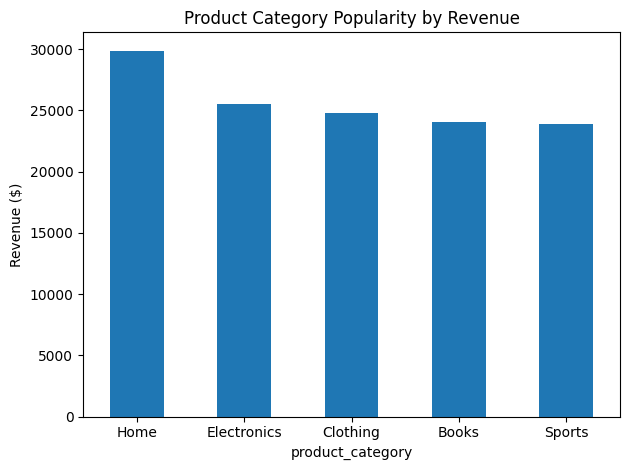

In [ ]:
product_category_popularity_quantity = data.groupby("product_category")["quantity"].sum().sort_values(ascending=False)
product_category_popularity_revenue = data.groupby("product_category")["revenue"].sum().sort_values(ascending=False)

print("Product Category Popularity by Quantity:")
print(product_category_popularity_quantity)
print("\nProduct Category Popularity by Revenue:")
print(product_category_popularity_revenue)

print("\nProduct Category Most Popular by Quantity:")
print(product_category_popularity_quantity.head(1).to_string(header=False))
print("\nProduct Category Most Popular by Revenue:")
print(product_category_popularity_revenue.head(1).to_string(header=False))

product_category_popularity_quantity.plot(kind="bar", title="Product Category Popularity by Quantity")
plt.ylabel("Quantity")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

product_category_popularity_revenue.plot(kind="bar", title="Product Category Popularity by Revenue")
plt.ylabel("Revenue ($)")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

# Home was the most popular category in terms of both quantity and revenue. It was not the 
# same order for the rest. For example, clothing was sold in more amounts, but came in third 
# below electronics for revenue totals, which can be explained by how expensive certain
# electronics are over clothing.

### 6. Discount Effectiveness
Do discounted orders generate higher or lower revenue per order compared to non-discounted orders?

In [ ]:
discounted_orders = data[data["discount_applied"] != 0]
discounted_orders_average_revenue = discounted_orders["revenue"].median()
non_discounted_orders = data[data["discount_applied"] == 0]
non_discounted_orders_average_revenue = non_discounted_orders["revenue"].median()

print("Revenue per Order of Discounted Orders:")
print(discounted_orders_average_revenue)
print("\nRevenue per Order of Non-Discounted Orders:")
print(non_discounted_orders_average_revenue)

discounted_order_are_higher = discounted_orders_average_revenue > non_discounted_orders_average_revenue
print("\nDiscounted orders generate", "higher" if discounted_order_are_higher else "lower", "revenue per order compared to non-discounted orders.")

# Using median shows a pretty noticeable difference between revenue per order of 
# discounted to non-discounted orders, being around 22% more.


Revenue per Order of Discounted Orders:
219.24

Revenue per Order of Non-Discounted Orders:
178.98

Discounted orders generate higher revenue per order compared to non-discounted orders.


### 7. Payment Method Usage
What percentage of orders use each payment method? Does any payment method correlate with higher spending?

Percentage of Each Payment Method of Orders:
payment_method
Credit Card    0.274
Gift Card      0.248
Debit Card     0.246
PayPal         0.232
Name: proportion, dtype: float64

Average Revenue by Payment Method:
payment_method
Debit Card     234.160
Gift Card      215.750
Credit Card    186.630
PayPal         164.945
Name: revenue, dtype: float64


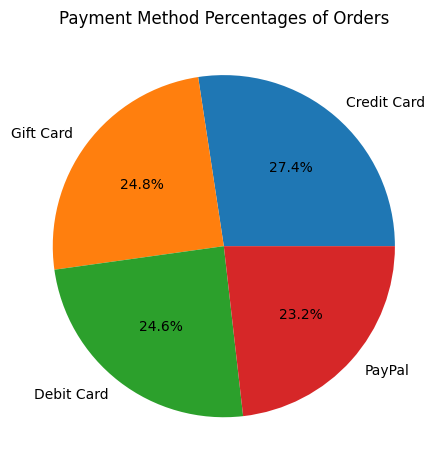

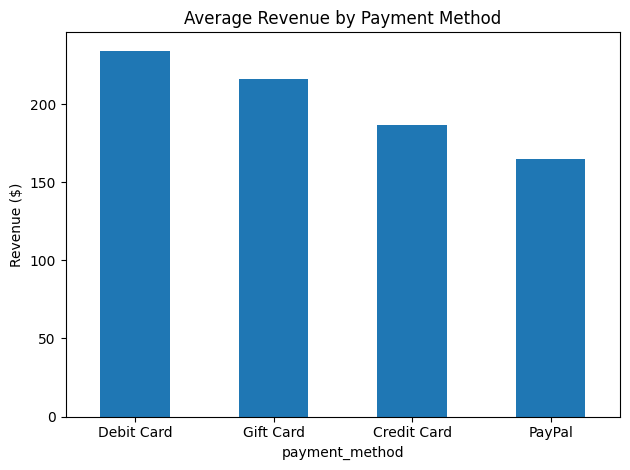

In [ ]:
payment_method_order_percentages = data["payment_method"].value_counts(normalize=True)
print("Percentage of Each Payment Method of Orders:")
print(payment_method_order_percentages)

payment_method_average_revenue = data.groupby("payment_method")["revenue"].median().sort_values(ascending=False)
print("\nAverage Revenue by Payment Method:")
print(payment_method_average_revenue)

payment_method_order_percentages.plot(kind="pie", autopct='%.1f%%', title="Payment Method Percentages of Orders")
plt.ylabel('')
plt.tight_layout()
plt.show()

payment_method_average_revenue.plot(kind="bar", title="Average Revenue by Payment Method")
plt.ylabel("Revenue ($)")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

# Credit cards are used the most but debit cards have the highest average spending.
# A reason could be people are more afraid to use money they don't have and rack up debt.

### 8. Seasonality Check
Plot revenue by day of week — are weekends busier than weekdays?

Revenue by Day of Week:
day_of_week
Thursday     164.040
Monday       171.130
Wednesday    184.840
Sunday       190.060
Tuesday      199.735
Friday       205.580
Saturday     253.240
Name: revenue, dtype: float64


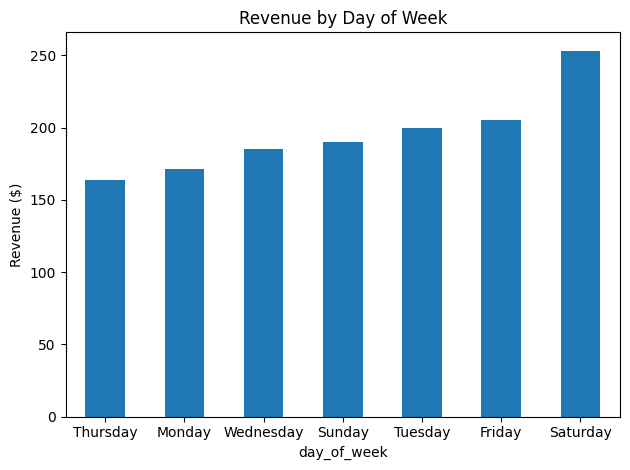

In [50]:
day_of_week_revenue = data.groupby("day_of_week")["revenue"].median().sort_values()
print("Revenue by Day of Week:")
print(day_of_week_revenue)

day_of_week_revenue.plot(kind="bar", title="Revenue by Day of Week")
plt.ylabel("Revenue ($)")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

# the generated data I had shows Saturday being the busiest based on revenue with close
# to $250, with the rest of the days being closer together between $150 and $200 averages.

### 9. Profitability (Stretch)
Assume profit margin = 20% of revenue. Estimate total profit and identify the most profitable region.

Total Profit is: $25628.13

Profit by Region:
region
South    6967.890
North    6870.338
East     6244.360
West     5545.546
Name: revenue, dtype: float64

The Most Profitable Region Is:
South    6967.89


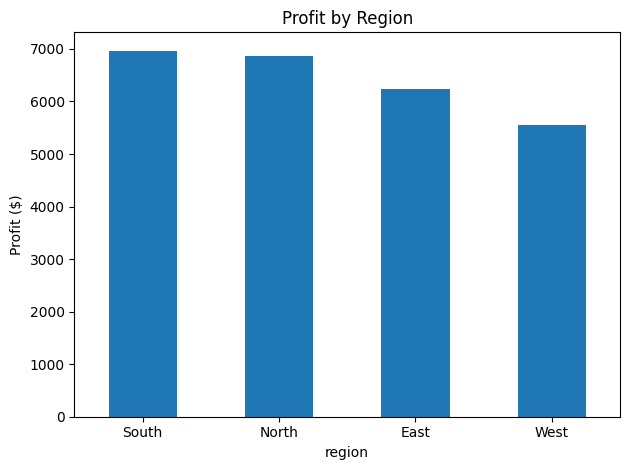

In [ ]:
total_profit = data["revenue"].sum() * .20
print(f"Total Profit is: ${total_profit.round(decimals=2)}")

profit_by_region = (data.groupby("region")["revenue"].sum() * .20).sort_values(ascending=False)
print("\nProfit by Region:")
print(profit_by_region)

print("\nThe Most Profitable Region Is:")
print(profit_by_region.head(1).to_string(header=False))

profit_by_region.plot(kind="bar", title="Profit by Region")
plt.ylabel("Profit ($)")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

# The total profit broken down by region shows a notable difference with West region
# being further below the others, while South and North are pretty similar up top.

### 10. Business Recommendation
Based on your findings, recommend one strategy (e.g., focus on certain customer segments, increase discounts, promote specific regions/products).

**Your recommendation here:**
I think Saturday's can be a good day of the week to promote discounts since more revenue is earned then than any other day of the week and discounts seem to produce more revenue as well.


Write your analysis and recommendation based on the insights you discovered from the data.

---

## Submission Requirements

1. **Complete code** for all 10 questions
2. **Clear visualizations** where appropriate  
3. **Brief interpretation** of each result
4. **Final business recommendation** with supporting data

Remember: Focus on what the numbers tell us about the business, not just the calculations themselves.